# Data Scientist Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*



The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
The last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from matplotlib import pyplot as plt
import seaborn as sn
# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")
copy_data = data.copy()
# Success - Display the first record
display(data.head(n=1))

for x in data.columns:
    if type( data[x]) is str:
        data[x] = data[x].str.replace(' ', '')

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, we will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.


In [2]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data.income == '>50K'].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data.income == '<=50K'].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round(100*n_greater_50k/(n_greater_50k +n_at_most_50k) , 2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

It was a bit unclear to me what few of these above mean so I searched over investopedia to find definitions for capital-gain and capital-loss (*a **capital gain** can occur on any security that is sold for a price higher than the purchase price that was paid for it. Realized capital **gains and losses** occur when an asset is sold, which triggers a taxable event. Unrealized gains and losses, sometimes referred to as paper gains and losses, reflect an increase or decrease in an investment's value but have not yet triggered a taxable event)

The next unclear feature was **"education-num"**. I looked into description where this data were downloaded from and it seems like any explanation on feature is missing. Will take a look in later section what that is.

To get a basic understanding of data lets plot some numerical pairs to see correlation.

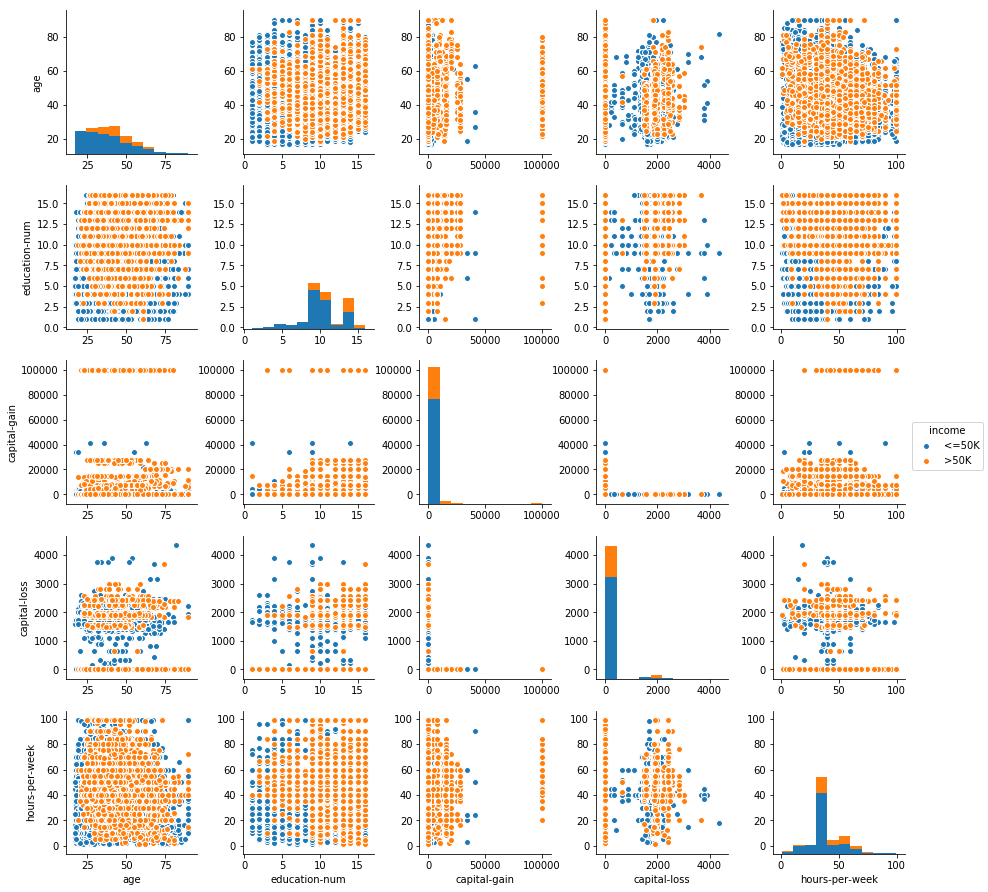

In [3]:
sn.pairplot(data=data, hue='income')

Bunch of outliers have been spotted in capita-gain feature ~ 100k. It looks like almost anyone who had any capital-gain automatically gets >50K overall income.

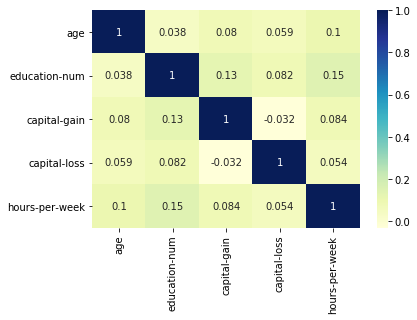

In [4]:
sn.heatmap(data.corr(), annot=True, cmap="YlGnBu");

Most of the features are categorical so we did not get the complete picture yet. These(continuous) are not seem to be strongly (even moderate) correlated. 
Lets check how many rows we do have within each category.

In [5]:
data[['native-country', 'sex', 'race', 'education_level', 'education-num']].apply(pd.Series.value_counts)

,native-country,sex,race,education_level,education-num
10th,NaN,NaN,NaN,1223.0,NaN
11th,NaN,NaN,NaN,1619.0,NaN
12th,NaN,NaN,NaN,577.0,NaN
1st-4th,NaN,NaN,NaN,222.0,NaN
5th-6th,NaN,NaN,NaN,449.0,NaN
7th-8th,NaN,NaN,NaN,823.0,NaN
9th,NaN,NaN,NaN,676.0,NaN
Amer-Indian-Eskimo,NaN,NaN,435.0,NaN,NaN
Asian-Pac-Islander,NaN,NaN,1303.0,NaN,NaN
Assoc-acdm,NaN,NaN,NaN,1507.0,NaN


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

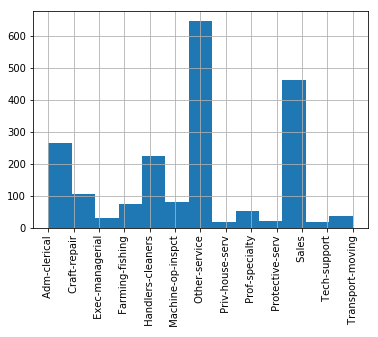

In [6]:
under_19 = data[data.age <20]
under_19.occupation.hist(bins=13)
plt.xticks(rotation=90)

Data mostly came out of US(41292) citizens. We have almost twice as many male(30527) as female(14695). White is over-represented versus others (38903 vs. 6319) and education_level seems to be same thing as education-num as those have same number of rows within each category.

2052 rows related to the individuals who's age under 19 (~4.5%). Among them number of child-owners, executives, investors, etc. That is quite strange. Lets take a look.
Exec-managerial under 19 with income less than 50k.. working 20-35h per week. These rows below are likely wrongly collected or inserted. 

In [7]:
exec_under19 = under_19[under_19.occupation.str.contains("Exec-managerial")]
exec_under19.sample(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
25967,19,Private,Some-college,10.0,Never-married,Exec-managerial,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K
39801,18,Local-gov,Some-college,10.0,Never-married,Exec-managerial,Own-child,White,Male,0.0,0.0,12.0,United-States,<=50K
2191,19,Private,Some-college,10.0,Never-married,Exec-managerial,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
17729,19,Private,Some-college,10.0,Never-married,Exec-managerial,Own-child,White,Male,0.0,0.0,15.0,United-States,<=50K
21880,18,Private,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


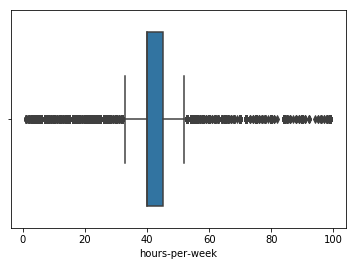

In [8]:
sn.boxplot(data=data, x='hours-per-week')

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 11 Text xticklabel objects>)

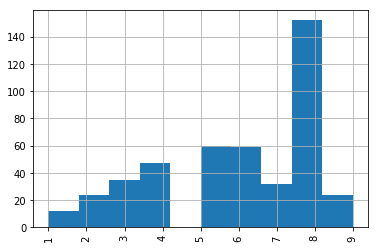

In [9]:
slacker = data[data['hours-per-week'] < 10]
slacker['hours-per-week'].hist()
plt.xticks(rotation=90)

There is number of individuals who works less than 10h per week. It is totally fine for whose who self-employed but not ok for state-gov or local-gov. Also maybe it worth removing those with 1,2,3h per week I cant even imagine what type of work is that. I do not know all possible cases but lets consider minimal hours per week equal to 5 (1h per day). Also I dont believe it is possible to work 99h per week at age 67 for example =) So we are going to fix these cases.
Lets consider max working hours as 2 *5 *8=80 and minimum as 1*5=5 and create bins.
14226 - old man involved in transport-moving working 99h per week.

In [10]:
data[data['hours-per-week'] > 80].sample(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
28497,31,Private,Prof-school,15.0,Never-married,Prof-specialty,Not-in-family,White,Female,0.0,0.0,99.0,United-States,<=50K
32207,43,State-gov,Some-college,10.0,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,84.0,United-States,<=50K
42507,52,Self-emp-not-inc,HS-grad,9.0,Divorced,Exec-managerial,Unmarried,White,Female,0.0,0.0,99.0,United-States,>50K
35548,41,Self-emp-not-inc,5th-6th,3.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,96.0,Mexico,<=50K
20242,31,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,91.0,United-States,<=50K


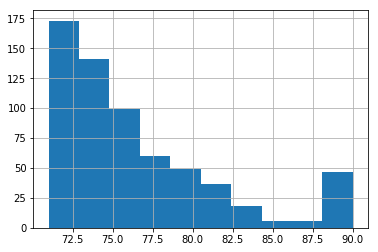

In [11]:
data[data['age'] >70].age.hist()

Looking at distributions of age there has been a hill at the very end of human life ~ 90 years and given downhill trend from 70 years to 87.5 I think that is not natural having that boost around 90 years. Most of those persons work more than 40h per week at this age =). Nice stamina. Based on plot above lets leave 90 years old count twice as less as 87.5 to continue given dynamic. Likely plain between 84 and 88 is our missing guys that stacked into 90 years old.
There are many case where data look strange: 1h-5h workers with good income, retired who works 40-80h per week, duplicates across set but it is really hard to find evidences of dupes since not that many unique features shown, country is mostly US, White totally dominating..

I dont how to fix this without guessing, lets put mean working hours to those who older 85 and we have something to do with overall amount of individuals near 90 years old. Lets keep only Exec Managerial of those who are ~90 and earn >50k.

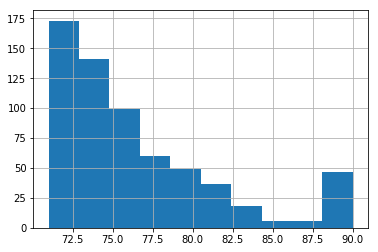

In [12]:
data[data['age'] >70].age.hist()

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

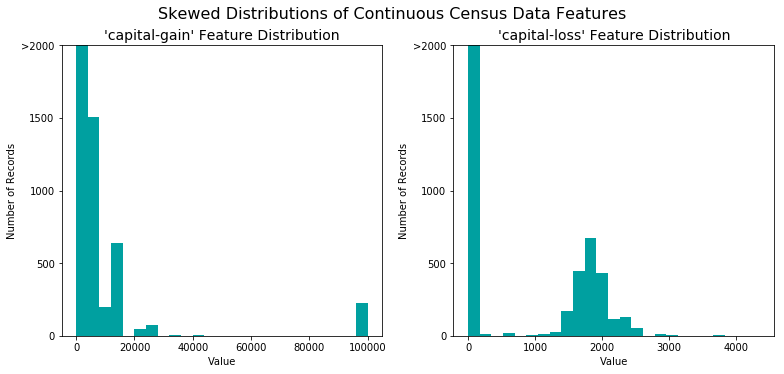

In [13]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

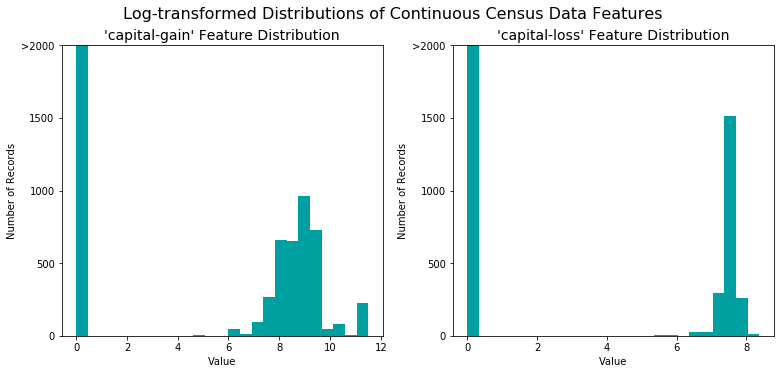

In [14]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
 Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners.

In [15]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively.

As we seen "education_level" has numerical representation so lets exclude this from columns being encoded to dummies.

In [16]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()

group_col = ['workclass','working_bin', 'occupation', 'marital-status', 'relationship', 'race', 'sex', 'native-country'] #'native-country'
features_final = pd.get_dummies(data=features_log_minmax_transform)

#features_final.drop('education_level', axis=1, inplace=True)
#features_final.drop('age', axis=1, inplace=True)
#features_final.drop('hours-per-week', axis=1, inplace=True)
#features_final.drop('native-country', axis=1, inplace=True)

# TODO: Encode the 'income_raw' data to numerical values
income = np.zeros(len(income_raw), dtype=int)
income[data.income == '>50K'] = 1

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print(encoded)

103 total features after one-hot encoding.


In [17]:
features_final.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=103)

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [18]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? 

In [19]:

TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
FP = income.size - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

accuracy = TP / income.size
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate accuracy, precision and recall
#accuracy = np.sum(income[income == 1]) / len(income)
#recall = np.sum(income[income == 1]) / np.sum(income[income == 1]) + 0
#precision = np.sum(income[income == 1]) / (len(income) - np.sum(income[income == 1]))

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta**2) * (precision*recall) / ((beta**2 * precision) + recall)
# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models


### Model Application


What do we know about data by this moment ?
We did not get that many insights from data exploration step but data seems to be well structured, no invalid or missing values, there are about 13 features, mostly categorical. Skewed proportion of results (~75% < 50k, ~25% > 50k)

As we are solving binary classification problem all of these should fit. Since there were no any space, dimensional, computational, execution-time constraints defined I would choose Ada Boost, SVM, Gaussian NB for solving the problem. 

* **AdaBoost** with decision trees as learners
    - I found several mentions related to AdaBoost and all seem more or less related to image recognition whether it is persons, players or faces such as "Viola–Jones object detection framework"
    https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework
    - best out-of-the-box classifier, less tweaking on parameters required
    - sensitive to noisy data and outliers, tends to over fitting.
    - given real, good, clean, well-organized data it should be beneficial to use this algorithm.
* **SVM**
    - text and hypertext categorization : Classification of news articles into categories ex. “business” and “Movies”
    - effective in high dimensional spaces, number of kernels provided to solve complex problems.
    - sensitive to number of features and samples.
    - given number of features in our frame equal to 103(after one-hot encoding) and number of samples ~45k sounds reasonable to give it a try since it handles high dimensional data quite well. Non-linear data could be classified using rbf kernel for example. 
* **Gaussian NB**
     - email spam detection, text categorization
     - fast, highly scalable, requires small amount of training data.
     - NB is known as a decent classifier. In this particular problem I think other algorithms will show better metrics but I want to try it out to see how fast it could be. 
     Not many features seem to be dependant and this is one of key requirements for Bayesian alg. Each feature could be as important as any other in data set and idea to find probabilty of income > 50k given those "independent features". Alg calculates conditional probabilities given each feature one by one and then combine result.
     

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data.

In [45]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation

- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3614 samples.
AdaBoostClassifier trained on 36140 samples.
SVC trained on 361 samples.
SVC trained on 3614 samples.
SVC trained on 36140 samples.
GaussianNB trained on 361 samples.
GaussianNB trained on 3614 samples.
GaussianNB trained on 36140 samples.


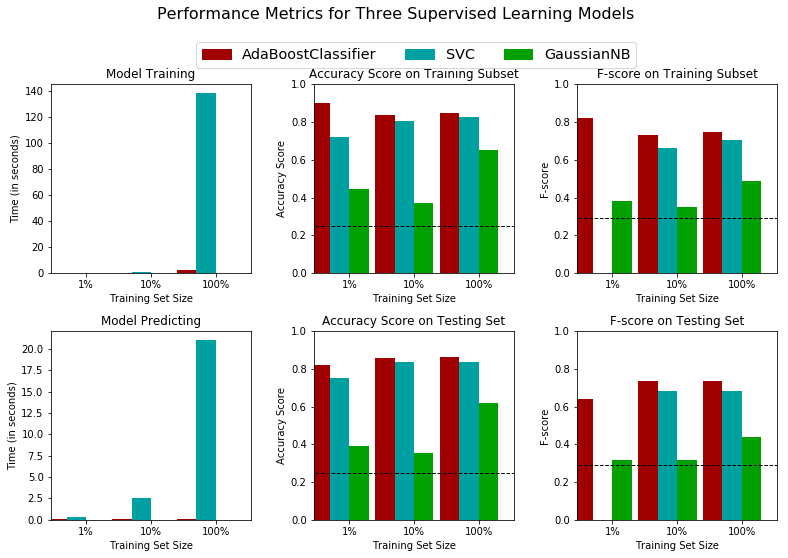

In [46]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# TODO: Initialize the three models
random_state = 23;
clf_A = AdaBoostClassifier(random_state=random_state)
clf_B = SVC(random_state=random_state)
clf_C = GaussianNB()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(len(y_train) * 0.1)
samples_1 = int(len(y_train) * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]: 
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, we will choose from the three supervised learning models the *best* model to use on the student data. I will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Choosing the Best Model

Based on results from above we got that AdaBoost showed best score out of the box. Naive Bayesian - worst (without tuning) but NB did it in a fraction of time spent by others. SVM made it nearly as good as AdaBoost but it took infinity time to teach/predict compared to NB and ADA.

It seems that bad results of NB gotten because of features dependencies, also we have only few numerical/continuous variables and two of those are not much represented over data set. 

AdaBoost and SVM in their turn are very good candidates, given that SVM has several kernels to address dimensionality problems and could really get data separated using polynomial function it seems like very good options to solve our problem and probably it will yield best result after proper tuning and selection kernel. 

I would stick to Ada Boost classifier as compromise between these two and as it has good time to train model and predict data.
            
|     Model     | Test Acc      |Test F-score  |
|:-------------:|:-------------:|:------------:| 
|       ADA     |       83%     |    71%       |  
|       SVM     |       82%     |    69%       | 
|       Naive G |       62%     |    41%       |

### Describing the Model in Layman's Terms

To put it simply ADA boosting it is like army of robots each of which could do simple task on small data set. To achieve that we need to split data set into many pieces and ask robots to do their job (at least better than random) of classifying objects within each set as being part of group -1 or 1 (in binary classification problem). During that micro classification process robot could get wrong and put -1's objects to 1's basket. We ask our helpers to pay more attention to those wrongly classified and to try fix that misclassification made on previous step. We can set up in advance number of iterations during which our robots will be trying to solve the problem. At some point we say "enough" and all robots go to one place for voting. Classification of each point could be treated as voting when we ask those robots based on their experience which basket we should put object in. Majority of votes is our result of object classification. Since after training we are getting separated areas

### Implementation: Model Tuning


In [47]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

random_state = 23;
# TODO: Initialize the classifier
clf = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=2,max_depth=8), 
                         random_state=random_state)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators':[10, 20, 50, 70, 100, 200, 300, 400], 
              'learning_rate':[0.003, 0.03, 0.3, 3, 30],
              'algorithm':['SAMME.R', 'SAMME']}


# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,scoring=scorer, param_grid = parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8365
F-score on testing data: 0.6722

Optimized Model
------
Final accuracy score on the testing data: 0.8650
Final F-score on the testing data: 0.7561


### Final Model Evaluation

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |         0.8365          |0.8650                 
| F-score        |            0.6722       |   0.7561     |


Unoptimized model(0.67) has been ~40% better than naive predictor (0.29). Optimized model showed the way better results yielding F-score of 0.7561 which is 6% better than unoptimized one. We improved naive predictor more than 46%.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

### Feature Relevance Observation


I think out of these thirteen features the ones that lead you to desired income are same as in real life :). If the people have some "capital-gain" this is a great sign of financial maturity so I would place it first. The second goes "Age" the older your the more you earn (till some point). Job divided into several class as in data set would not contribute much from my point of view. Also as defined earlier set is comprised of white American mostly so pass on these two "race", "native-country". "Hours per week, workclass, occupation, education" have something in common maybe it worth taking one of these into account. Let it be "education". We saw that data skewed in favor of males so it makes great impact on overall result. And last I choose "relationship"
**capital-gain -> age -> education -> gender -> relationship**

### Implementation - Extracting Feature Importance


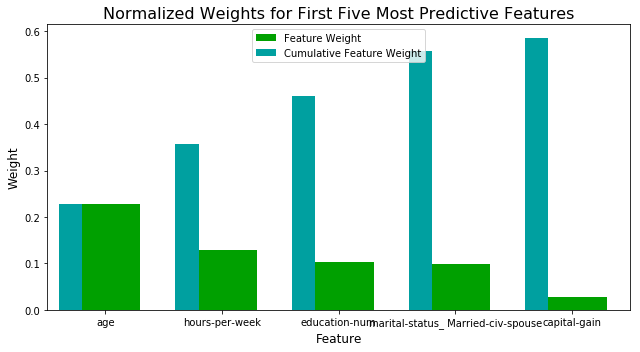

In [48]:
# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=2,max_depth=8), 
                           learning_rate=0.03,
                           n_estimators=200,
                           random_state=random_state)

importances = model.fit(X_train, y_train).feature_importances_

# TODO: Extract the feature importances using .feature_importances_ 

# Plot
vs.feature_plot(importances, X_train, y_train)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

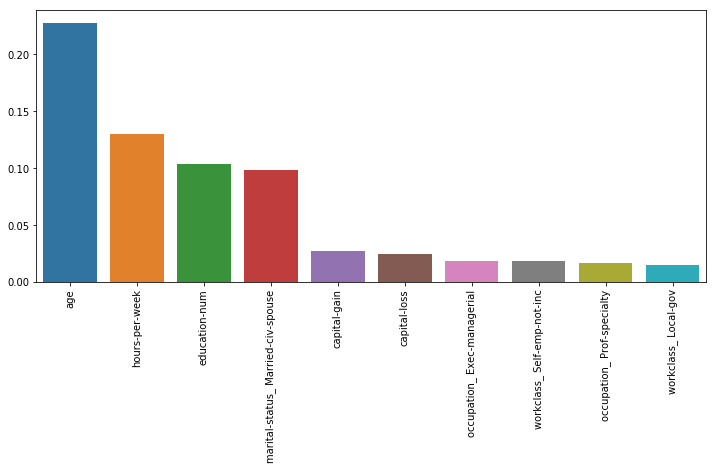

In [49]:
feature_value = pd.Series(importances,index=X_train.columns)
feature_value.sort_values(inplace=True, ascending=False)
plt.figure(figsize=(12,5))
sn.barplot(x=feature_value.index[:10], y=feature_value[:10])
plt.xticks(rotation=90)

### Extracting Feature Importance

I chose features names before they were renamed but anyway I was wrong. That is surprise to me that capital-gain contributed less than capital-loss. Maybe there were not that many success stories in this data set.
I got right age and education which seem obvious. Hours per wick took third place okay.. maybe it makes sense. My idea was to exclude hours per week since we got education already but maybe there could be number of cases where it is clear sign of making less than 50k. Gender did not contribute at all probably i did assess this feature completely wrong given that majority of rows are males it gives us no unique data. Relationship and marital status it is kind of similar things or I did not get context right.

| My choice   |  | Experimental result| 
|:------------:| |:------------------:|
|capital-gain|   |age  |
|age|             |education_num |
|education|        |hours-per week |
|gender|           |marital status_Married_civ_spouse  |
|relationship|      |capital-loss  |

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn.

In [50]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8650
F-score on testing data: 0.7561

Final Model trained on reduced data
------
Accuracy on testing data: 0.8550
F-score on testing data: 0.7227


### Effects of Feature Selection

On reduced data we got a bit lower results and it is not surprising. Accuracy score did not change dramatically just about 3% less. F-score dropped more noticeably ~ 8 points down. In our case 0.66 is 2 times better than simple guessing (0.29). I think it depends on complexity of task we would have been solving. If it required great timing on retraining the model.. no probably even in that case I would not stick to 0.6 F-score. Had I this choice I would had chosen to revisit model and find other ways to improve score and speed. Only if initial F-score was that good so I would not had noticed reduced score, in that case  - yes it worth switching. Either way it depends on many many circumstances you face in real project with.